# Employee Turnover: Prediction and Analysis of Impact on the Company

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df = pd.read_csv('AbandonoEmpleados.csv', sep=';', index_col='id', na_values='#N/D')

In [3]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Baja,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Media,80,1,6,0,NaN,6,NaN,0,3


# Business Analytics

Data visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_civil 

# Null data

In [5]:
df.isna().sum().sort_values(ascending = False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

# Conclusions such as:

- Years in the position and work-life balance have too many nulls ----> eliminate variables

- Gender, education, satisfaction, and involvement ----> impute after EDA







In [6]:
df.drop(columns = ['anos_en_puesto','conciliacion'], inplace = True)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,incremento_salario_porc,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,11,Alta,Baja,80,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,23,Muy_Alta,Muy_Alta,80,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,15,Alta,Media,80,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,11,Alta,Alta,80,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,12,Alta,Muy_Alta,80,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,17,Alta,Alta,80,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,15,Alta,Baja,80,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,20,Muy_Alta,Media,80,1,6,0,6,0,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_civil 

# EDA for Categorical Variables

In [8]:
def graficos_eda_categorica(cat):
    # Calcula el número de filas necesarias
    filas = ceil(cat.shape[1] / 2)
    
    # Define el tamaño del gráfico
    f, ax = plt.subplots(nrows=filas, ncols=2, figsize=(16, filas * 6))
    
    # Aplana el array de ejes para iterar como si fuera unidimensional
    ax = ax.flatten()
    
    # Itera sobre las variables categóricas y crea los gráficos
    for idx, variable in enumerate(cat.columns):
        cat[variable].value_counts().plot.barh(ax=ax[idx], color='skyblue')
        ax[idx].set_title(variable, fontsize=12, fontweight='bold')
        ax[idx].tick_params(labelsize=12)
    
    # Si hay menos gráficos que ejes, se eliminan los ejes sobrantes
    for j in range(len(cat.columns), len(ax)):
        f.delaxes(ax[j])
    
    plt.tight_layout()
    plt.show()

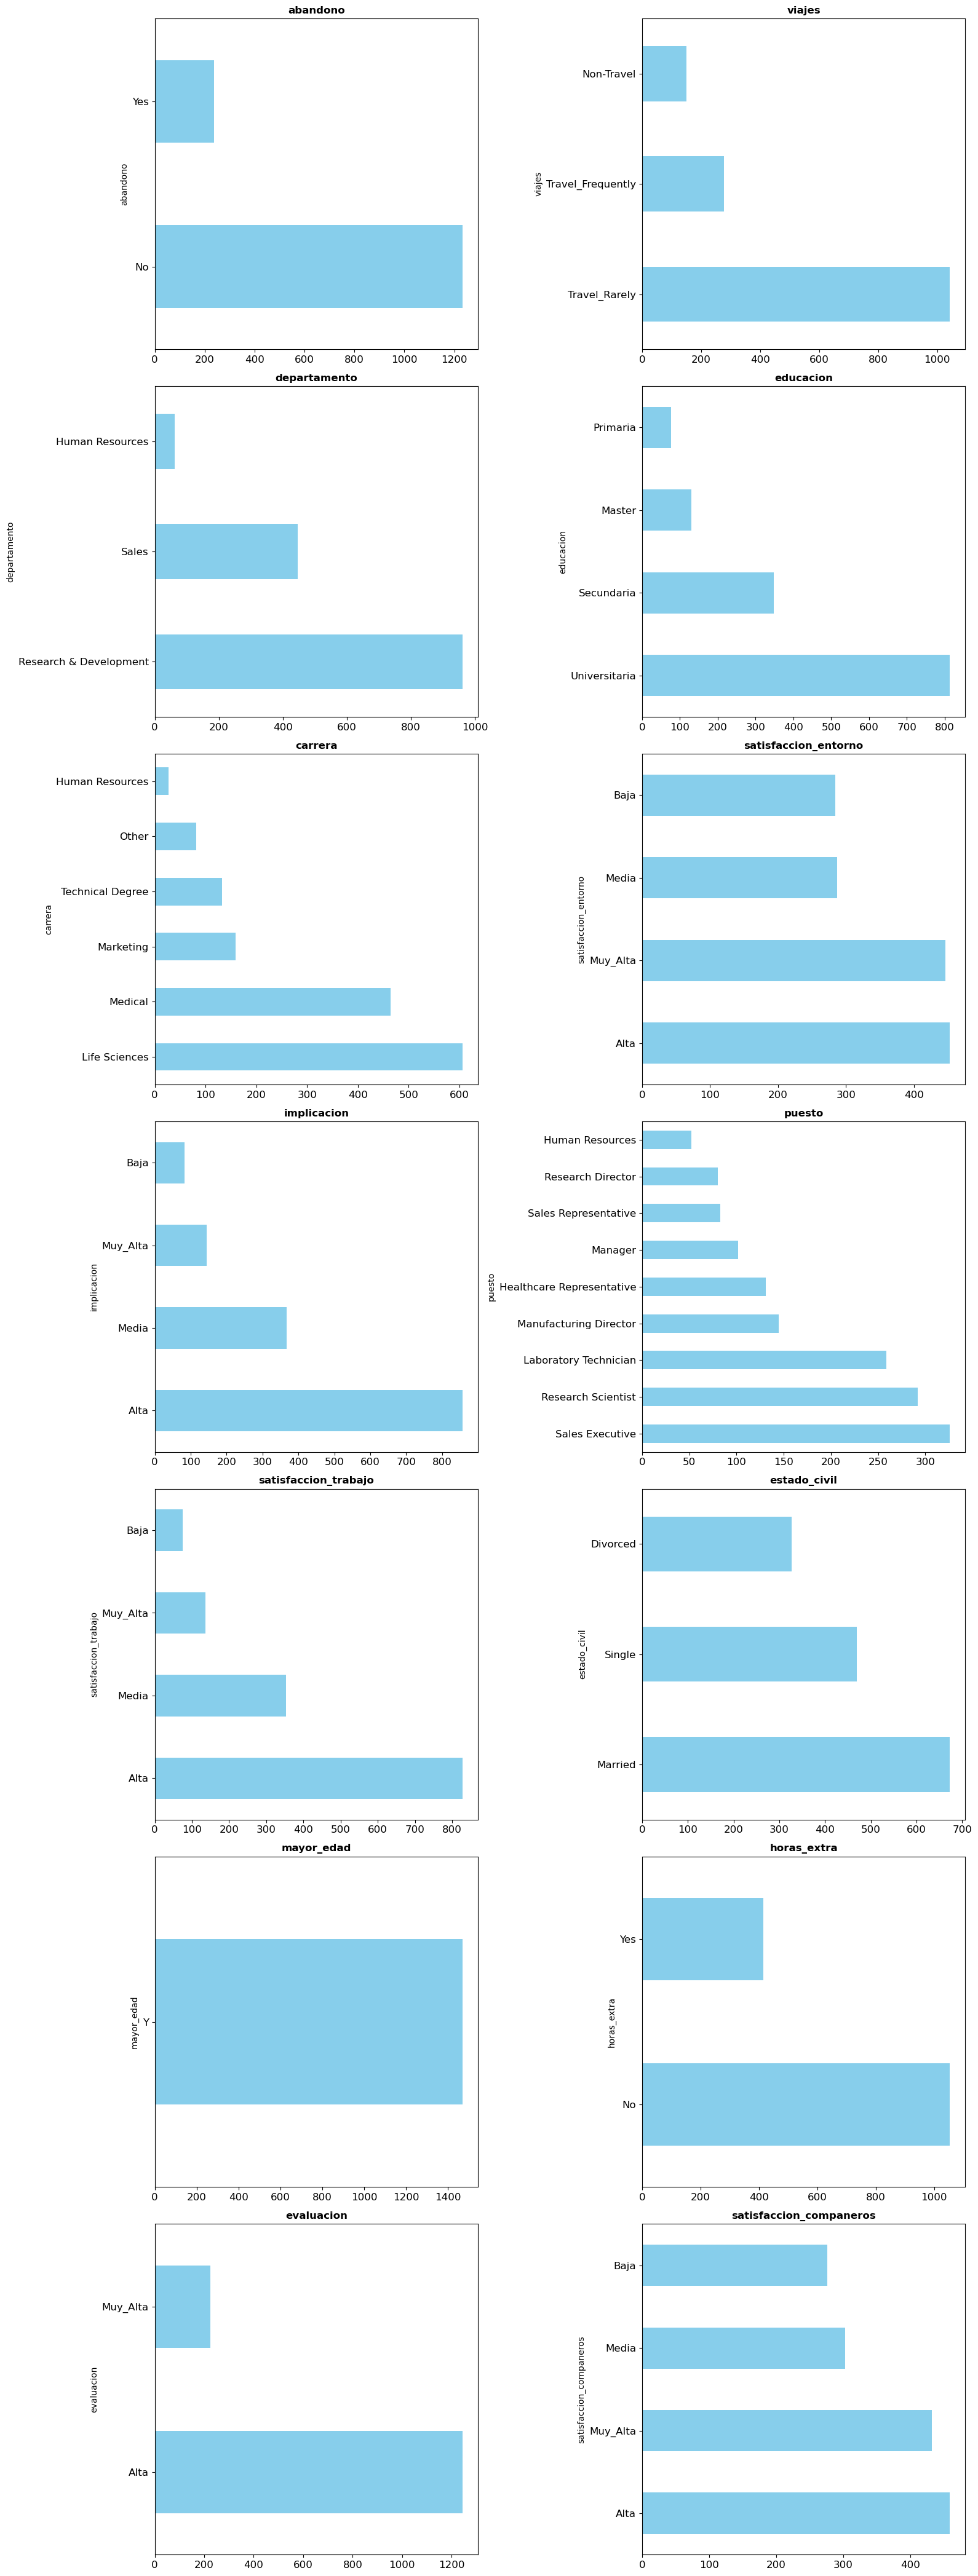

In [9]:
graficos_eda_categorica(df.select_dtypes('O'))

# Conclusions

* The "Older Age" variable only has one value ---> eliminate it
* For pending imputations:
  - **Education:** Impute with "University"
  - **Satisfaction:** Impute with "High"
  - **Involvement:** Impute with "High"

In [10]:
df.drop(columns = 'mayor_edad' , inplace = True)

df['educacion'] = df['educacion'].fillna('Universitaria')

df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')

df['implicacion'] = df['implicacion'].fillna('Alta')


# EDA Numeric Variables

In [11]:
def estadisticos_cont(num):
# Calculation describes
    estadisticos = num.describe().T
# We add the median
    estadisticos['median'] = num.median()
# Rearrange so that the median is next to the mean
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
# We returnit
    return(estadisticos)

In [12]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


# Conclusions:
* Employees only has one value ---> delete it
* Sex has 4 values ​​---> Delete it
* Fortnightly hours only have one value ----> Delete it
* Of the nulls pending imputation that are numerical, they are only in the sex, but since they are going to be imputed, nothing is done in that case

In [13]:
df.drop(columns = ['empleados', 'sexo','horas_quincena'], inplace = True)

In [14]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,No,12,Alta,Muy_Alta,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,No,17,Alta,Alta,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,No,15,Alta,Baja,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Yes,20,Muy_Alta,Media,1,6,0,6,0,3


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edad                      1470 non-null   int64 
 1   abandono                  1470 non-null   object
 2   viajes                    1470 non-null   object
 3   departamento              1470 non-null   object
 4   distancia_casa            1470 non-null   int64 
 5   educacion                 1470 non-null   object
 6   carrera                   1470 non-null   object
 7   satisfaccion_entorno      1470 non-null   object
 8   implicacion               1470 non-null   object
 9   nivel_laboral             1470 non-null   int64 
 10  puesto                    1470 non-null   object
 11  satisfaccion_trabajo      1470 non-null   object
 12  estado_civil              1470 non-null   object
 13  salario_mes               1470 non-null   int64 
 14  num_empresas_anteriores   147

# Generation Insights

In [16]:
# What is the abandonment rate?
df.abandono.value_counts(normalize = True) * 100

abandono
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

In [17]:
# What employee profile does the company leave?
#Transform abandonment to numeric
df['abandono'] = df.abandono.map({'No':0,'Yes':1})

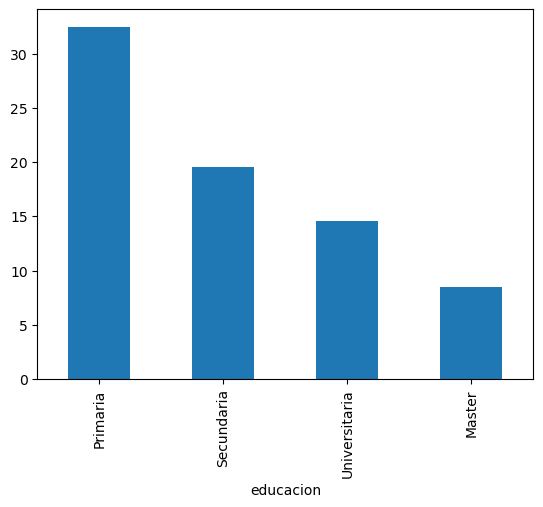

In [18]:
#analysis for education
temp = df.groupby('educacion').abandono.mean().sort_values(ascending = False)*100
temp.plot.bar();

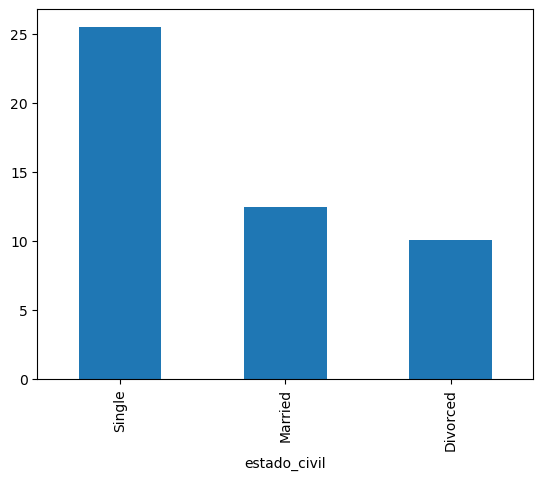

In [19]:
# Analysis by marital status
temp = df.groupby('estado_civil').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

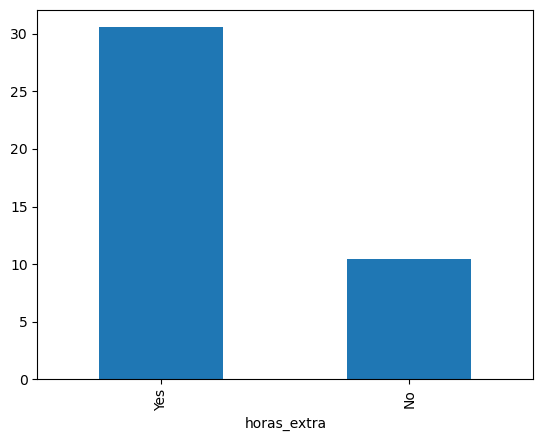

In [20]:
# Analysis for overtime
temp = df.groupby('horas_extra').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

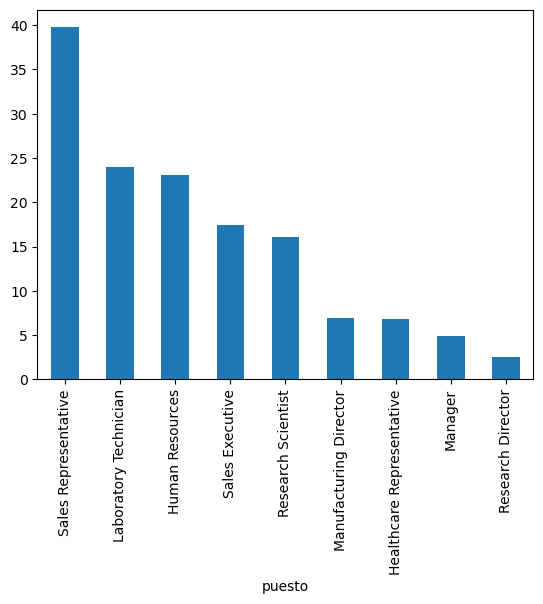

In [21]:
# Analysis by position
temp = df.groupby('puesto').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

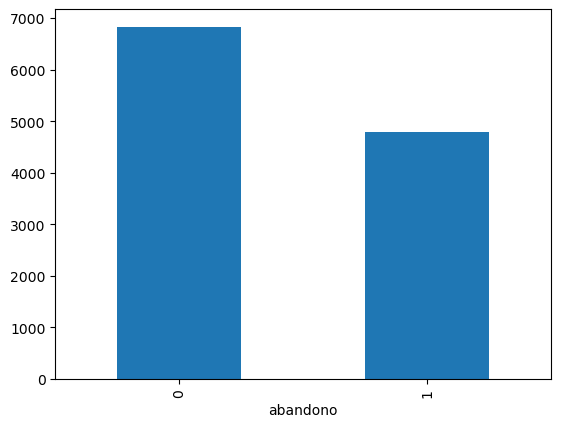

In [22]:
# Analysis by Salary
temp = df.groupby('abandono').salario_mes.mean()
temp.plot.bar();

# Conclusions:
* Employees leave the company due to factors such as:
  -----
  * Low education level
  * Being single
  * Working in sales
  * Low salary
  * High amount of overtime


# What is the Economic Impact of This Problem?

According to the study 'Cost of Turnover' by the Center for American Progress:

* The cost of turnover for employees earning less than 30,000 is 16.1% of their salary.
* The cost of turnover for employees earning between 30,000 and 50,000 is 19.7% of their salary.
* The cost of turnover for employees earning between 50,000 and 75,000 is 20.4% of their salary.
* The cost of turnover for employees earning more than 75,000 is 21% of their salary.

In [23]:
#We create a new variable salary_year of the employee
df['salario_ano'] = df.salario_mes.transform(lambda x:x*12)
df[['salario_mes','salario_ano']]

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [24]:
# We calculate the economic impact of each employee if they leave the company

# List of conditions
condiciones = [(df['salario_ano'] <= 30000),
               (df['salario_ano'] > 30000) & (df['salario_ano'] <= 50000),
               (df['salario_ano'] > 50000) & (df['salario_ano'] <= 75000),
               (df['salario_ano'] > 75000)]

#List of results
resultados = [df.salario_ano * 0.161, df.salario_ano * 0.197, df.salario_ano * 0.204, df.salario_ano * 0.21, ]

#we apply the select
df['impacto_abandono'] = np.select(condiciones,resultados,default= -999)

df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,Alta,1,17,3,5,0,3,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Alta,Baja,1,9,5,7,1,7,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Muy_Alta,Media,1,6,0,6,0,3,73704,15035.616


In [25]:
# How much did it cost in the last year?
coste_total = df.loc[df.abandono == 1].impacto_abandono.sum()
coste_total

2719005.912

In [26]:
#How much does it cost us if employees are not motivated?
df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_abandono.sum()

368672.688

In [27]:
#How much money could we save by retaining employees?
print(f'Reducir un 10% la fuga de empleados nos ahorraria {int(coste_total * 0.1)}$ cada año')

print(f'Reducir un 20% la fuga de empleados nos ahorraria {int(coste_total * 0.2)}$ cada año')

print(f'Reducir un 30% la fuga de empleados nos ahorraria {int(coste_total * 0.3)}$ cada año')

Reducir un 10% la fuga de empleados nos ahorraria 271900$ cada año
Reducir un 20% la fuga de empleados nos ahorraria 543801$ cada año
Reducir un 30% la fuga de empleados nos ahorraria 815701$ cada año


# And We Can Continue Developing Strategies Related to Turnover Insights

We observed that sales representatives are the position with the highest turnover. Would it make sense to create a specific plan for them? What would be the cost savings if we reduced turnover by 30%?

First, we could calculate the percentage of sales representatives who left last year.

In [28]:
total_repre_pasado = len(df.loc[df.puesto == 'Sales Representative'])
abandonos_repre_pasado = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 1)])
porc_pasado = abandonos_repre_pasado / total_repre_pasado

porc_pasado

0.39759036144578314

In [29]:
# We will calculate how many will leave this year
total_repre_actual = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0)])
se_iran = int(total_repre_actual * porc_pasado)

se_iran

19

In [30]:
retenemos = int(se_iran * 0.3)

ahorramos = df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0), 'impacto_abandono'].sum()* porc_pasado * 0.3

print(f'Podemos retener {retenemos} representates de venta y ellos nos podria ahorrar {ahorramos}$.')

Podemos retener 5 representates de venta y ellos nos podria ahorrar 37447.22424578312$.


# Machine Learning Modeling

In [31]:
df_ml = df.copy()

In [32]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empresas_

In [33]:
cat = df_ml.select_dtypes('O')
ohe = OneHotEncoder(sparse = False)
ohe.fit(cat)

cat_ohe = ohe.transform(cat)
cat_ohe = pd.DataFrame(cat_ohe,columns= ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

C:\Users\Daniel\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [34]:
cat_ohe

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [35]:
num = df.select_dtypes('number').reset_index(drop = True)

In [36]:
df_ml = pd.concat([cat_ohe,num], axis = 1 )
df_ml

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,17,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4,15,1,9,5,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,20,1,6,0,6,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,14,0,17,3,9,0,8,64680,13194.720


In [37]:
x = df_ml.drop(columns='abandono')
y = df_ml[('abandono')]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

# DecisionTreeClassifier

In [39]:
ac = DecisionTreeClassifier(max_depth=4)
ac.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [43]:
pred = ac.predict_proba(X_test)[:,1]
pred[:20]

roc_auc_score(y_test,pred)

0.7325865209471766

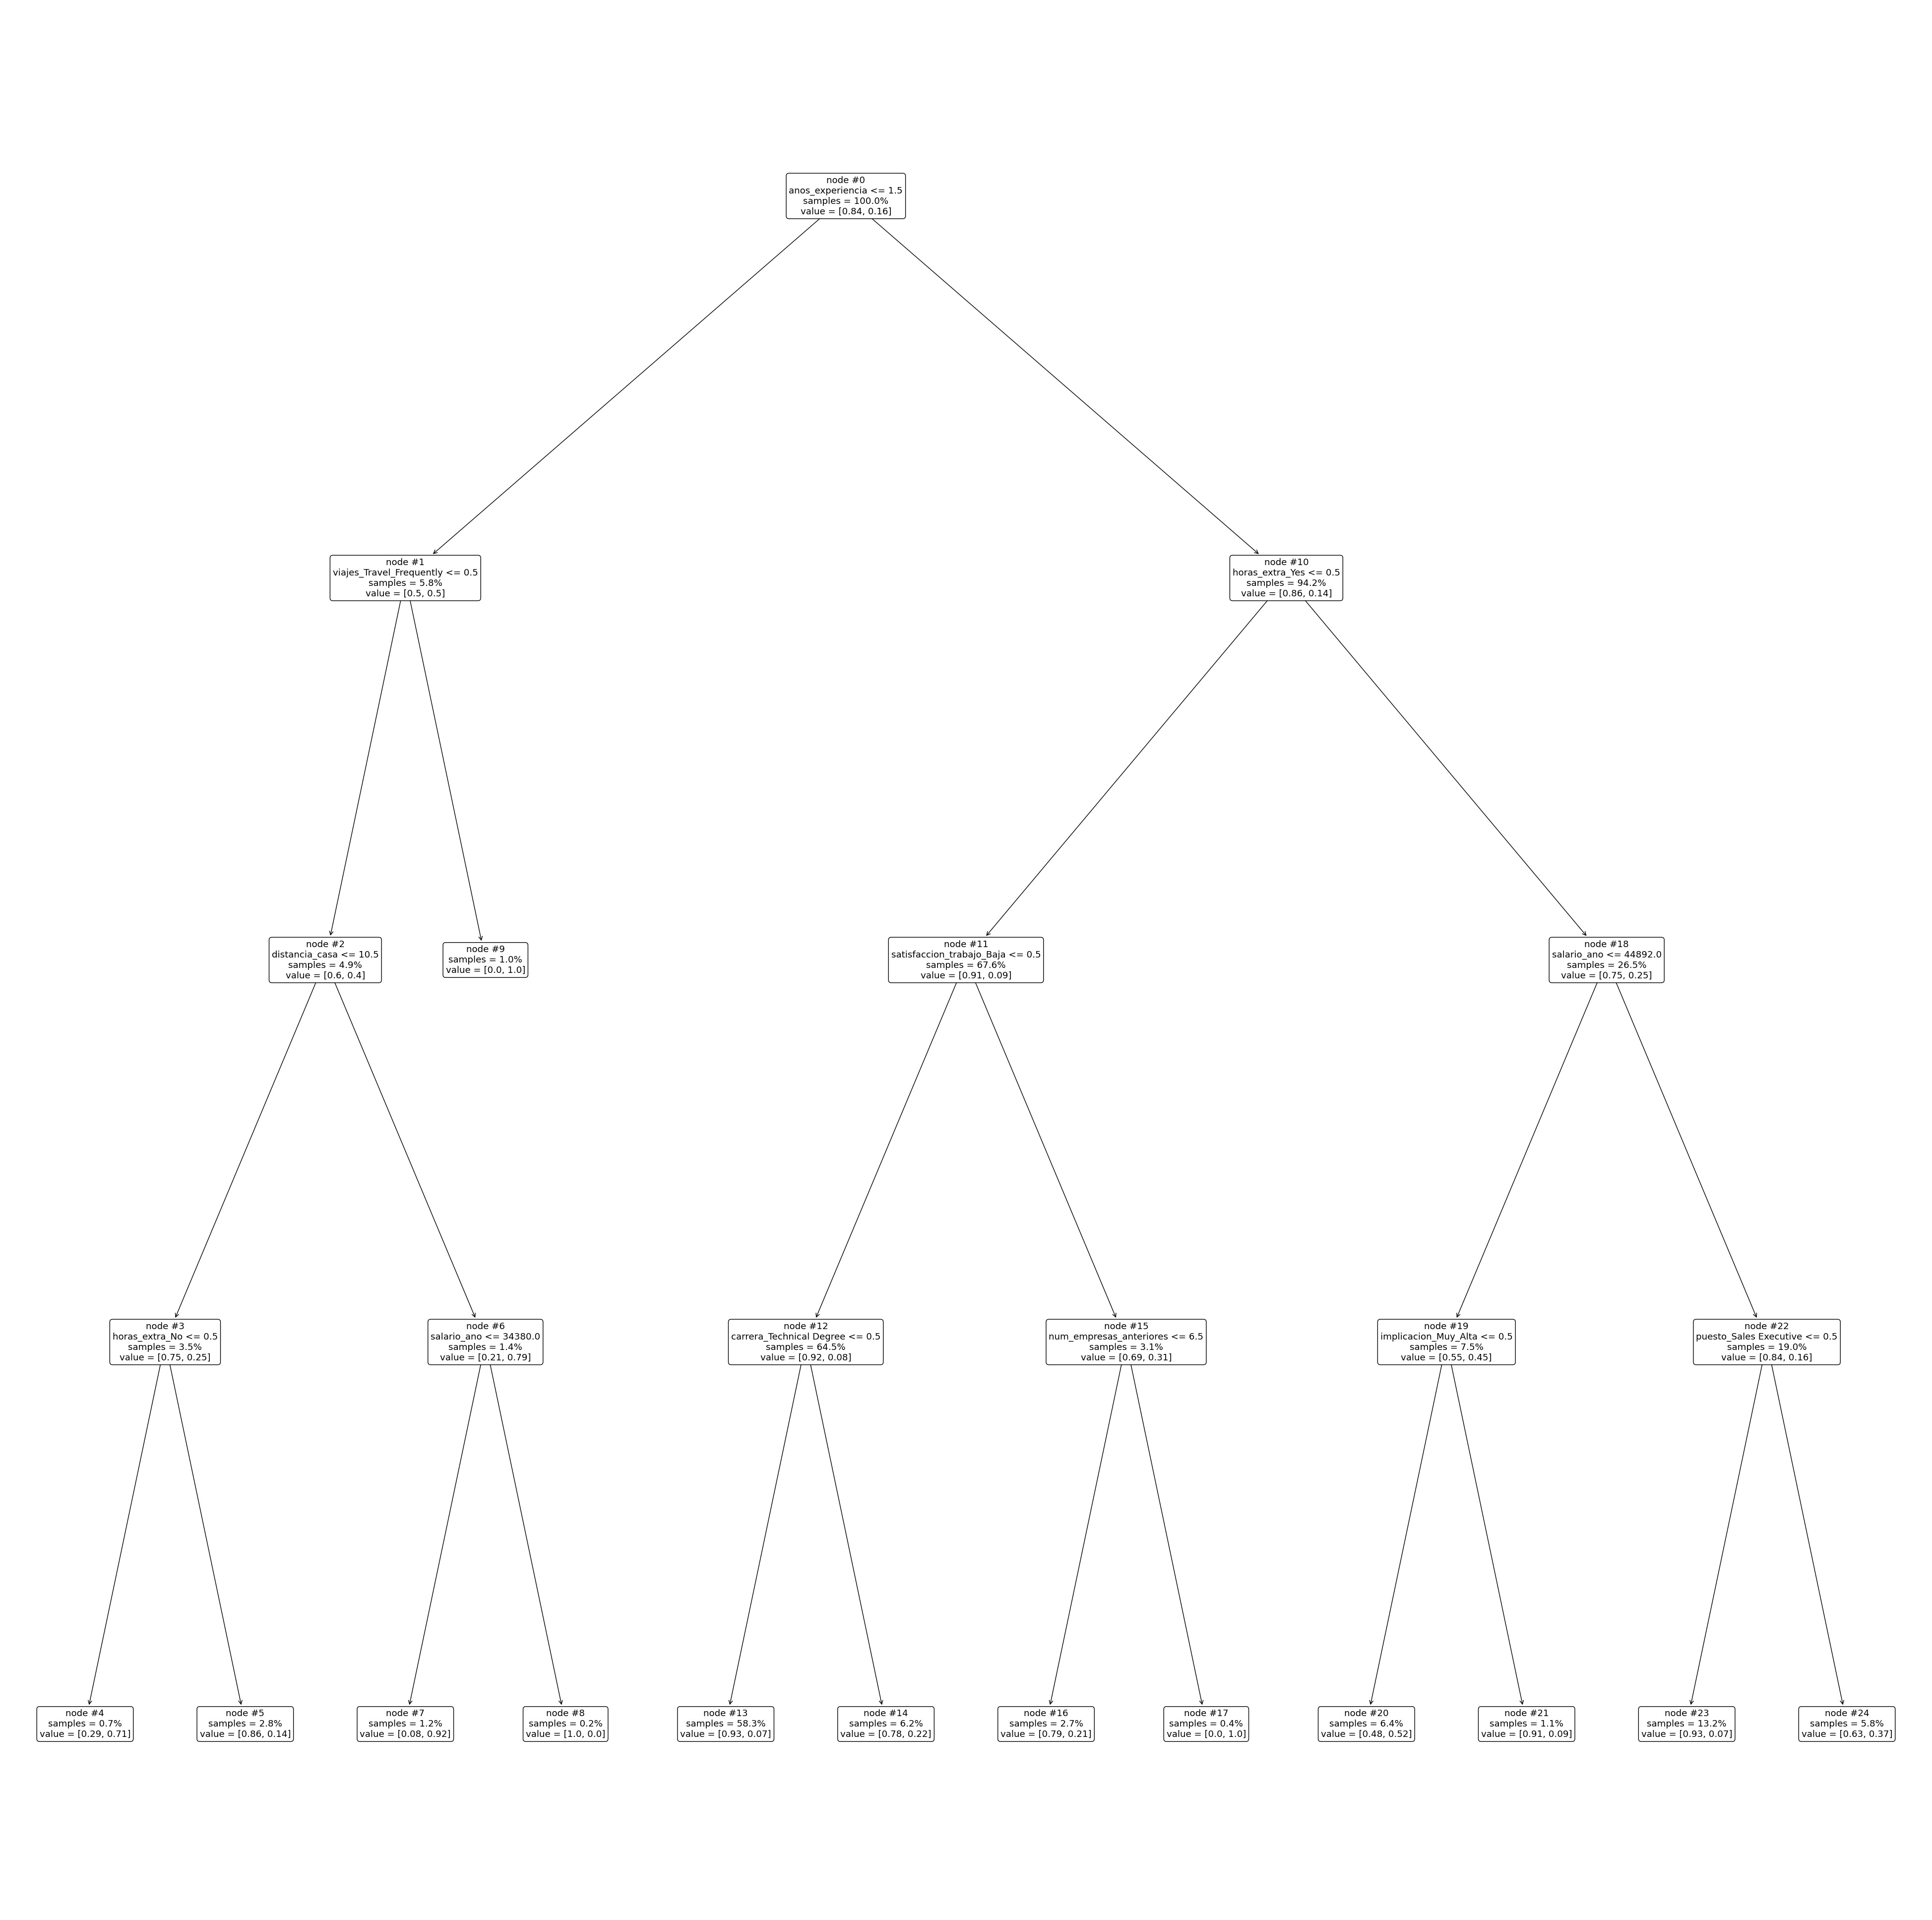

In [46]:
# Tree diagram
plt.figure(figsize= (50,50))
plot_tree(ac,
          feature_names = X_test.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

<Axes: >

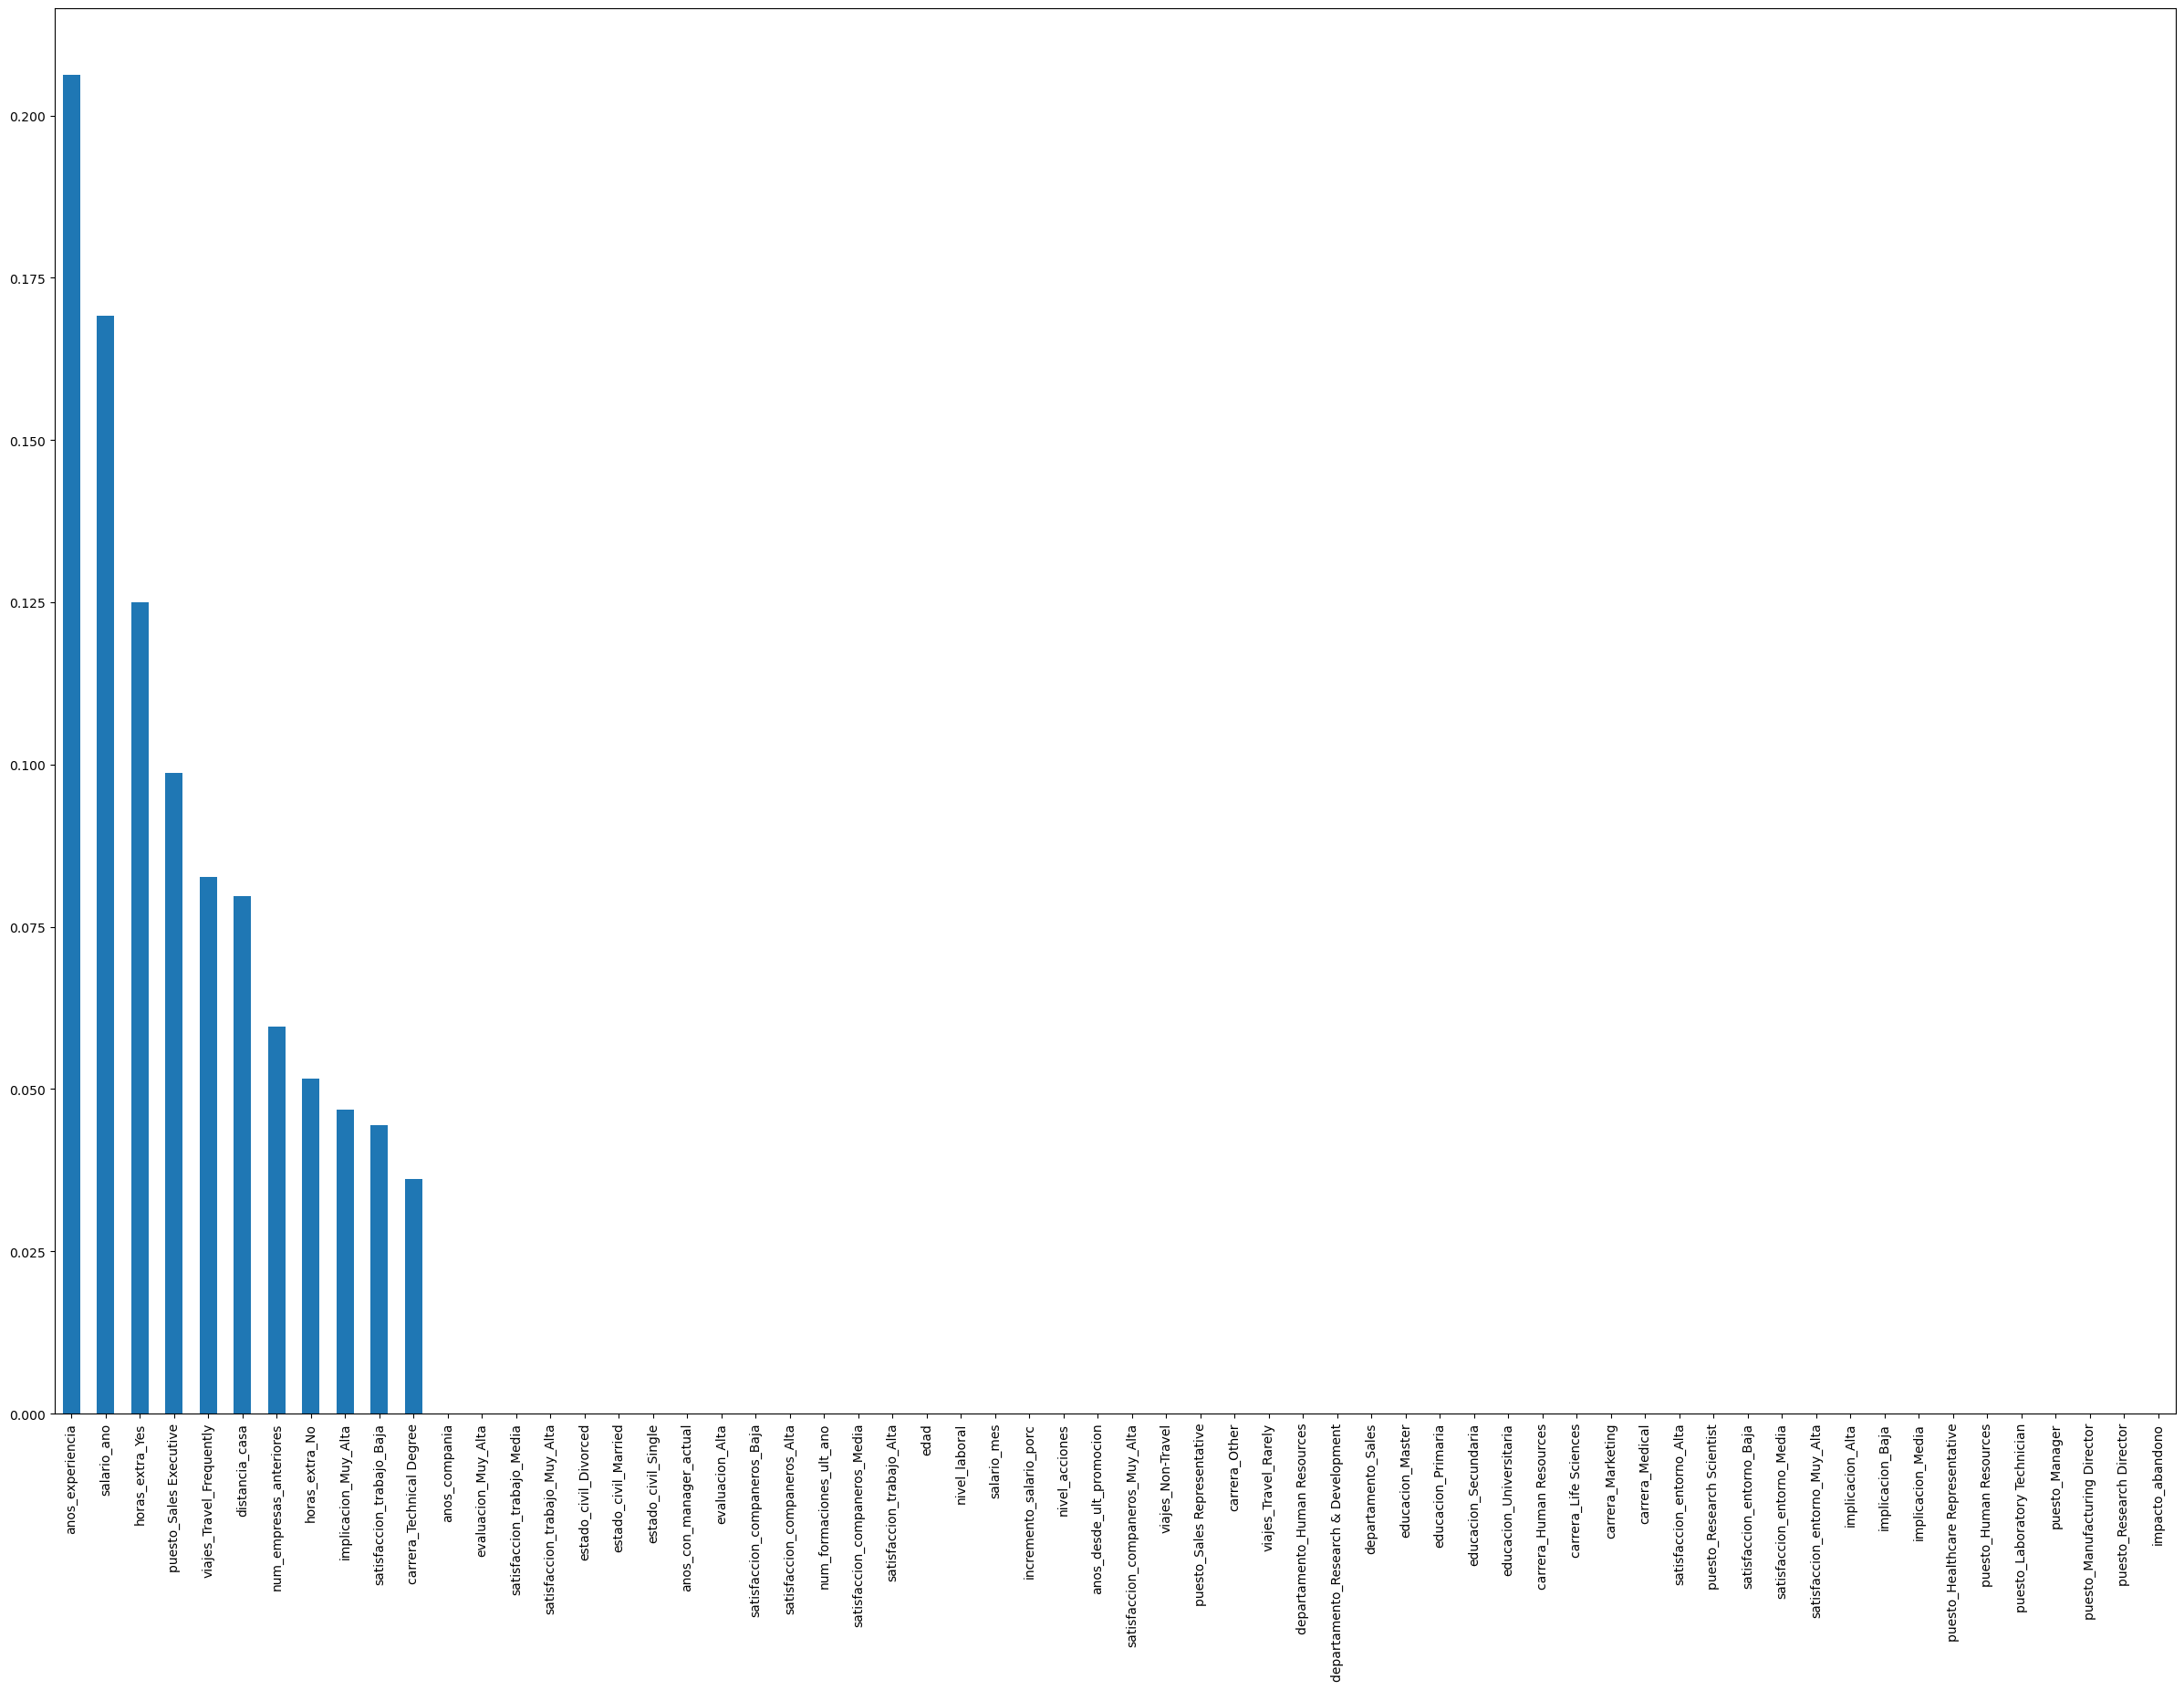

In [47]:
pd.Series(ac.feature_importances_,index=X_test.columns).sort_values(ascending = False).plot(kind = 'bar',figsize = (30,20))

In [48]:
df['scoring_abandono'] = ac.predict_proba(df_ml.drop(columns = 'abandono'))[:,1]
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.366667
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.068333
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.515152
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.515152
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.068333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.068333
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.068333
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.073529


In [49]:
# 10 examples of employees most likely to leave:

df.sort_values(by = 'scoring_abandono', ascending = False)[0:10]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1037,26,1,Non-Travel,Sales,29,Universitaria,Medical,Media,Baja,2,...,Muy_Alta,0,7,6,2,2,2,59628,12164.112,1.0
584,33,1,Travel_Rarely,Research & Development,10,Primaria,Medical,Baja,Baja,1,...,Baja,3,8,2,4,1,3,40896,8056.512,1.0
2023,23,1,Travel_Frequently,Sales,9,Universitaria,Marketing,Muy_Alta,Alta,1,...,Baja,1,1,3,1,1,0,21480,3458.280,1.0
680,30,0,Travel_Frequently,Research & Development,3,Universitaria,Medical,Alta,Alta,1,...,Alta,1,1,2,1,0,0,24996,4024.356,1.0
1111,28,1,Travel_Frequently,Research & Development,1,Secundaria,Medical,Baja,Media,1,...,Baja,2,1,2,1,0,0,31152,6136.944,1.0
1188,43,1,Travel_Rarely,Sales,9,Primaria,Marketing,Baja,Baja,2,...,Media,0,7,2,4,1,3,64152,13087.008,1.0
556,38,0,Travel_Frequently,Research & Development,2,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,1,1,3,1,0,0,20424,3288.264,1.0
1716,47,1,Travel_Frequently,Sales,9,Primaria,Life Sciences,Alta,Baja,4,...,Alta,0,25,3,23,14,10,155232,32598.720,1.0
1203,22,1,Travel_Frequently,Research & Development,3,Secundaria,Life Sciences,Alta,Media,1,...,Media,1,1,5,0,0,0,34236,6744.492,1.0


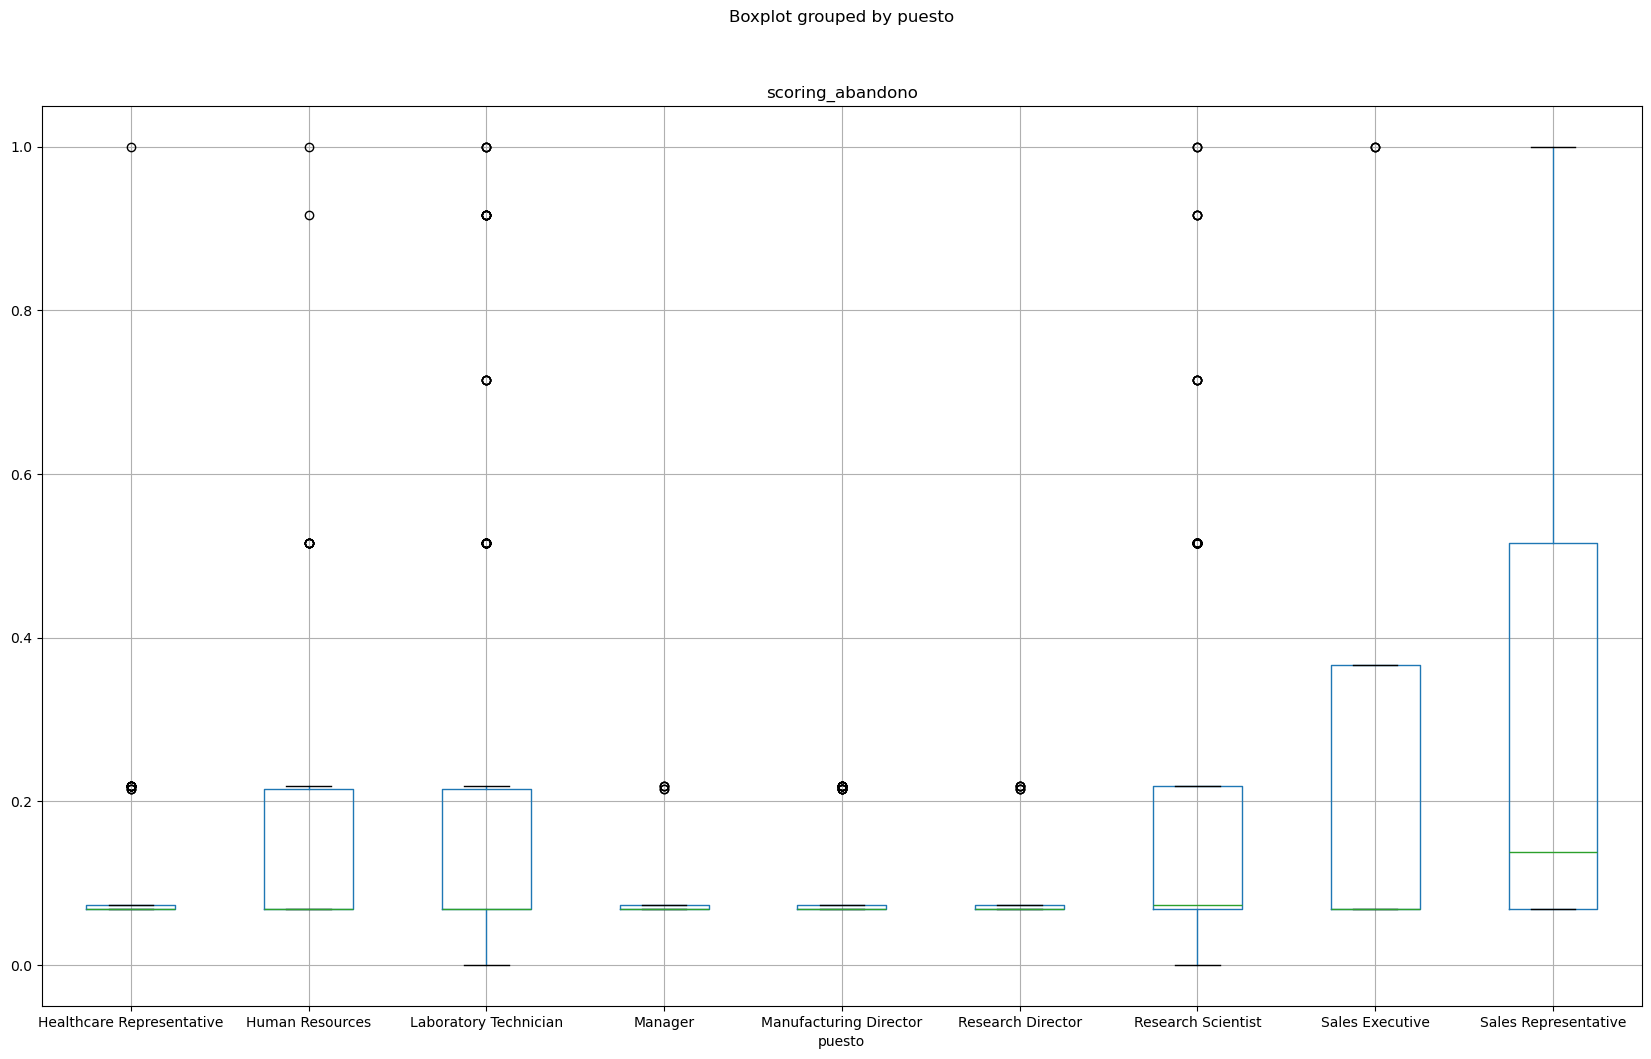

In [50]:
# Example: Risk of Leaving the Company Due to Job Position

df.boxplot(column = 'scoring_abandono', by = 'puesto', figsize = (20,12));

In [51]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.366667
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.068333
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.515152
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.515152
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.068333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.068333
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.068333
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.073529


In [ ]:
df.to_excel('abandono_con_scoring.xlsx')
files.download('abandono_con_scoring.xlsx')

# For better results, the following is implemented:

### Hyperparameter Optimization
- Grid Search: Performs an exhaustive search over a predefined set of hyperparameters.
- Random Search: Explores random combinations of hyperparameters to find those that improve performance.
- Bayesian Optimization: Uses probabilistic methods to find the best hyperparameters.
### Model Tuning
- Try Different Models: Experiment with different classification algorithms, such as Random Forest, XGBoost, LightGBM, or Neural Networks.
- Ensemble Learning: Combines multiple models to enhance prediction (for example, through bagging, boosting, or stacking).